In [1]:
import numpy as np
from numpy import array
%matplotlib inline
import matplotlib.pyplot as plt
import random
import pickle

import scipy

import skimage.transform as sit
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVC

In [3]:
import pulse2percept as p2p
import visual
import importlib

In [79]:
#each time you change visual, run reload
importlib.reload(visual)

<module 'visual' from '/mnt/home/luntzel/VisualStimuli/visual.py'>

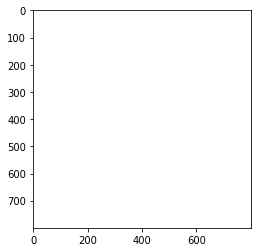

In [5]:
#blank white for some operations
imgw = np.load("imgw.npy") #800x800
imgwlarge = np.load("imgwlarge.npy") #1520x520

plt.figure()
plt.imshow(imgw)
theta = 90

(1520, 1520, 3)


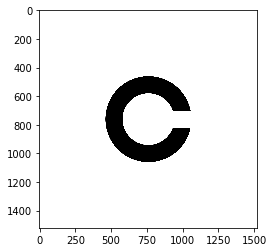

In [6]:
#default ring
img_original = io.imread("Landolt5.png")
img_og = io.imread("Landolt2.png")
#img_og = np.load("Landolt2.npy") #currently using this as the base image bc you can move small c-rings to the edge of image

# plt.figure()
# plt.imshow(img_original)

print(img_og.shape)
plt.figure()
plt.imshow(img_og)

In [6]:
#no repeats, just a 396-image dataset
A = np.load("training3.npy")
print(A.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'training3.npy'

In [4]:
#large (2376) dataset. takes a bit to load in
A = np.load("training.npy")
print(A.shape)

(2376, 1920000)


In [10]:
A2=A.copy()

In [12]:
print(A2.shape)
A2 = A2.reshape(2376, 800, 800, 3)
print(A2.shape)

(2376, 1920000)
(2376, 800, 800, 3)


In [13]:
A2 = A2[:,:,:,0]
print(A2.shape)

(2376, 800, 800)


In [14]:
A2 = A2.reshape(2376, 640000)

In [16]:
np.save("trainingbw", A2)

In [12]:
#99x4, just 2x 4x compressions and mostly non-random translating
B = np.load("training2.npy")
print(B.shape)

(396, 1920000)


In [ ]:
#large dataset, w/ noise added
A2 = np.load("trainingwnoise.npy")
print(A2.shape)

(1520, 1520, 3) (1520, 1520, 3)


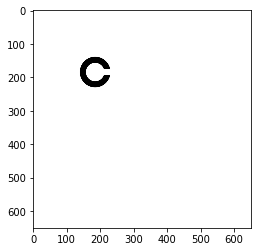

In [7]:
#determine size of C so that I can find the max translation relative to a compression
x = img_original[200:1000, 200:1000]

x2 = imgw.copy()
x2[97:702, 99:701] = x[103:708, 91:693]

x3 = imgwlarge.copy()
x3[297:902, 299:901] = x[103:708, 91:693]

x4 = x3.copy()#[100:1100, 100:1100]#[200:1000,200:1000]
x4 = visual.compressx(x4, 6.5)
print(x3.shape, x3.shape)
plt.figure()
plt.imshow(x4[550:1200, 550:1200])

In [165]:
#y2 is a np.ndarray
#what order polynomial?
#future direction: equation so any compression
np.save("t_by_c", y2)

<class 'numpy.ndarray'>


[100.27 102.93 ... 353.75 353.74] (600,)
353.7379057794138 311.4119854519293


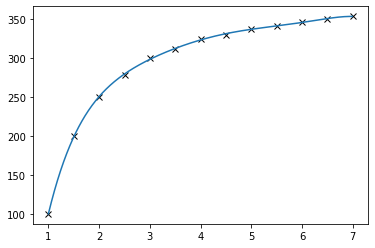

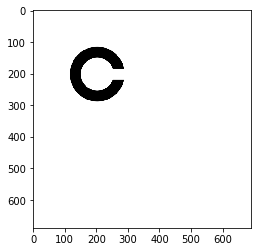

In [8]:
data = [[1,100],[1.5,200],[2,250],[2.5,279],[3,300],[3.5,312],[4,325],[4.5,330],[5,337],[5.5,342],[6,347],[6.5,350],[7,354]]
x, y = zip(*data)
plt.plot(x, y, 'kx')

#stacked_x = np.array([x,x+1,x-1])
#logistic function
coeffs = np.polyfit(x,y,6)#mpf(stacked_x, y, deg) (for multivariate data)
x2 = np.arange(min(x), max(x), .01) #use more points for a smoother plot
y2 = np.polyval(coeffs, x2) #Evaluates the polynomial for each x2 value
print(y2, y2.shape)
print(y2[599], y2[245]) #last value in array = 7x compression
plt.plot(x2, y2)
#for a given compression size c, ((c - 1) * 100) - 1 = index. Now you can write a general method to make a dataset at whatever
#compression factor you want by indexing y2 and using that as the max shift.

x4 = x3.copy()#[100:1100, 100:1100]#[200:1000,200:1000]
x4 = visual.compressx(x4, 3.46)
shift = int(np.rint((y2[int(((3.46 - 1) * 100) - 1)]))) #looks roundabout, but it makes sense
plt.figure()
plt.imshow(x4[200+shift:1200, 200+shift:1200])

[340.8    1.45   1.41]
[1.   1.01 ... 6.98 6.99]


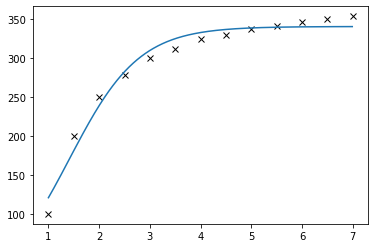

In [123]:
#logistic function
def logistic(x, L, k, xn):
    return L / (1 + np.exp(-k*(x - xn)))

params_ortho, cov_ortho = scipy.optimize.curve_fit(logistic, x, y, p0=[0,0,0])
print(params_ortho)

#print(scipy.optimize.curve_fit(lambda t,L,k,tn: L / (1 + np.exp(-k(t - tn))), x, y))
                               #a+b*np.log(t),  x,  y)) #lambda t #(lambda t,a,b,c: a+b*np.log(c*t),  x,  y))
# plt.plot(x, y, 'kx')
# plt.plot(x2, 147.81+117.7*np.log(x2))
print(x2)
plt.plot(x, y, 'kx')
plt.plot(x2, logistic(x2, params_ortho[0], params_ortho[1], params_ortho[2]))

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
sum = 0
for train, test in kf.split(data):
    #calculate variance
#     train_data = np.array(data)[train]
#     test_data = np.array(data)[test]
#     classifier = nltk.NaiveBayesClassifier.train(train_data)
#     sum += nltk.classify.accuracy(classifier, test_data)
average = sum/3

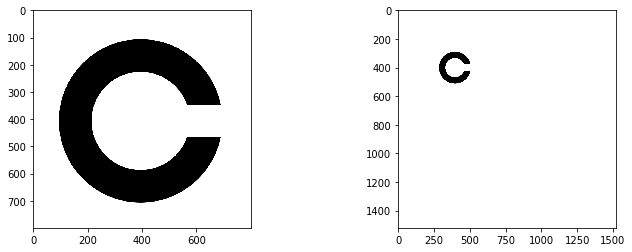

In [85]:
#displaying methods together
test = img_original[200:1000, 200:1000]


test = visual.rotateclean(test, 45)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(test)
plt.subplot(122)
plt.imshow(visual.compressx(test, 2.7))

255 0 <class 'imageio.core.util.Array'>
252 252 (296, 296, 3) (1520, 1520, 3)


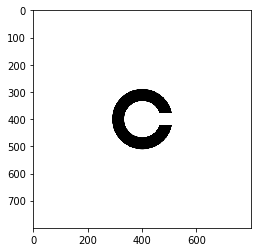

preparerot


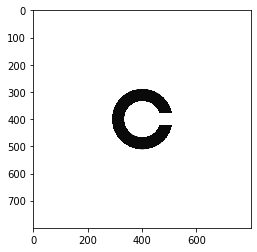

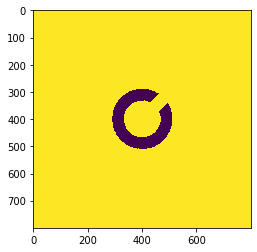

In [257]:
#each time you change visual, run reload
#issue is rotateclean
#importlib.reload(visual)

shift = int(np.rint((y2[int((2 - 1) * 100)]) * 1)) #w/o 800/800
start = int((1520 - 800) / 2)  #1520 - 800 / 2
stop = int(start + 800) #start + 800

new_img = img_og.copy()[360:1160, 360:1160]#resize(new_img, (int(np.rint(1520 / (800 / 800))), int(np.rint(1520 / (800 / 800)))))
print(np.amax(new_img), np.amin(new_img), type(new_img))

if (2 != 1):
    rot = visual.compressx(new_img, 2.7)[0:800, 0:800]
#     plt.figure()
#     plt.imshow(rot)
    plt.imshow(rot, interpolation='nearest')
    plt.show()
    
rot = visual.rotateclean(rot, 45)[:,:,0] #cut out RGB #img_og
plt.figure()
plt.imshow(rot)


# plt.figure()
# plt.imshow(new_img)

# #rot = rot[start:stop, start:stop]#.flatten()
# # plt.figure()
# # plt.imshow(rot)
# plt.imshow(new_img[start:stop, start:stop])
# plt.show()
# rot2 = rot[:,:,0]#resize(rot, (400,400))
# plt.matshow(rot2)
# plt.show()
# print(rot2.shape)

In [264]:
importlib.reload(visual)

<module 'visual' from '/mnt/home/luntzel/VisualStimuli/visual.py'>

In [216]:
img_ognpy = np.load("Landolt2.npy")

114 114 (571, 571, 3) (1520, 1520, 3)
preparerot


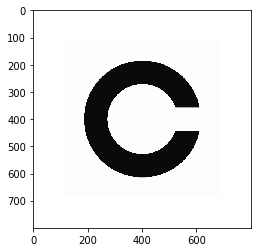

<Figure size 432x288 with 0 Axes>

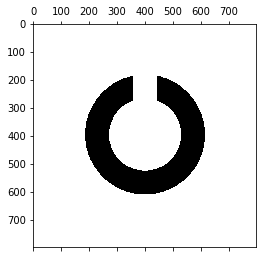

In [256]:
# importlib.reload(visual)

# new_img = img_og.copy()[360:1160, 360:1160] #ognpy
# for i in range(0, 50):
#     rot = visual.compressx(new_img, 1 + .05*i)[0:800, 0:800]
#     rot = visual.rotateclean(rot, 90) #[:,:,0] #cut out RGB #img_og
#     plt.figure()
#     plt.matshow(rot)
#     plt.figure()
#     plt.imshow(rot)
new_img = img_og.copy()[360:1160, 360:1160] #ognpy
rot = visual.compressx(new_img, 1.4)[0:800, 0:800]
# print("post-compress")
# plt.figure()
# plt.imshow(rot)
rot = visual.rotateclean(rot, 90) #[:,:,0] #cut out RGB #img_og
plt.figure()
plt.matshow(rot)

# rot2 = visual.compressx(new_img, 2.3)[0:800, 0:800]
# plt.figure()
# plt.imshow(rot2)
# rot2 = visual.rotateclean(rot2, 90) #[:,:,0] #cut out RGB #img_og
# plt.figure()
# plt.matshow(rot2)
# print("post-rotateclean")
# plt.figure()
# plt.matshow(rot)
# print(np.amax(rot), np.amin(rot))
# print(np.amax(rot[250:550]), np.amin(rot[250:550]))
# new_img = img_og.copy()[360:1160, 360:1160]#resize(new_img, (int(np.rint(1520 / (800 / 800))), int(np.rint(1520 / (800 / 800)))))

# if (2 != 1):
# rot = visual.compressx(new_img, 1.4)[0:800, 0:800]
# #     plt.figure()
# #     plt.imshow(rot)
#     plt.imshow(rot, interpolation='nearest')
#     plt.show()
    
# rot = visual.rotateclean(rot, 90) #[:,:,0] #cut out RGB #img_og
# plt.figure()
# plt.imshow(rot)

In [17]:
#ignore 
#sanity check: LDA at least classified images it was trained on
for i in range(0, int(360 / theta)):
    new_img = rotate(img_original, theta * i)
    rot = new_img[200:1000, 200:1000].flatten()
    rot2 = imgw.flatten()#new_img[199:999, 199:999].flatten() (avoiding error where # images <= # unique features)
    if (i == 0):
        C = np.vstack([[rot], [rot2]])
    else:
        C = np.vstack([C, [rot], [rot2]])

print(C, C.shape)

tempfeatures = []

#for 396 dataset (current)
for i in range(0, int(360 / theta)):
    tempfeatures.append(i * theta)
    tempfeatures.append(i * theta)
    
print(tempfeatures)
        
#clf = LinearDiscriminantAnalysis()
clf = SVC(gamma='auto')
clf.fit(C, tempfeatures)#temp_train, tempfeatures_train)
SVC(gamma='auto')

#size = temp_test.shape[0]
#print("size: ", size)
#clone1a = temp_test.copy()
for j in range(4):
    new_img = rotate(img_original, theta * i)
    new_img = new_img[200:1000, 200:1000].flatten()
    if (clf.predict([new_img]) == theta * i): #temp in future
        print("working")
    else:
        print("uh-oh")

[[  1.   1. ...   1.   1.]
 [255. 255. ... 255. 255.]
 ...
 [  1.   1. ...   1.   1.]
 [255. 255. ... 255. 255.]] (8, 1920000)
[0, 0, 90, 90, 180, 180, 270, 270]
working
working
working
working


Start and Stop indices:  360 1160
(64, 640000)
(64, 640000)


ValueError: cannot reshape array of size 640000 into shape (400,400)

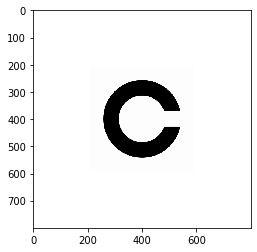

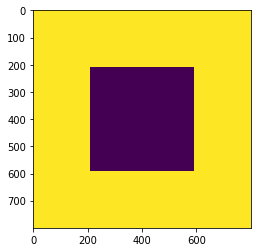

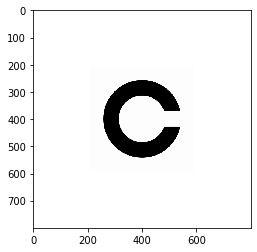

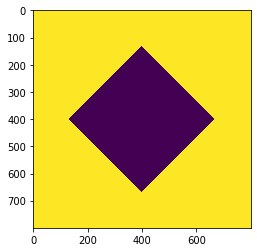

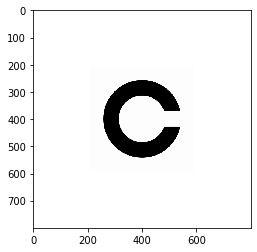

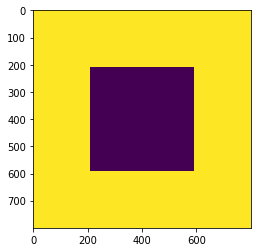

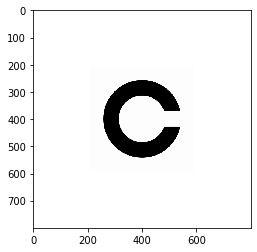

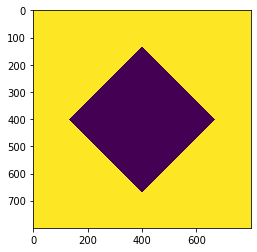

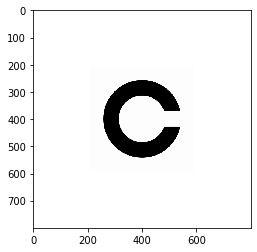

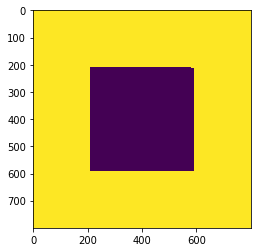

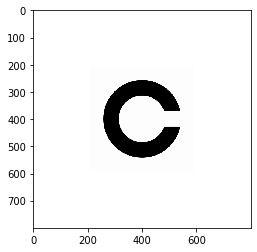

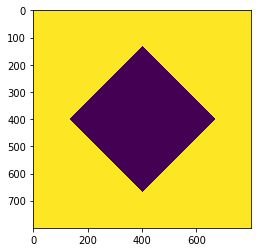

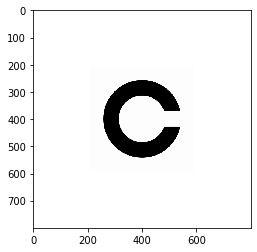

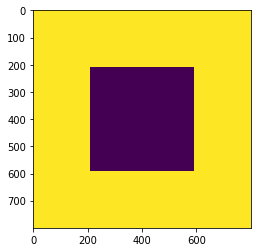

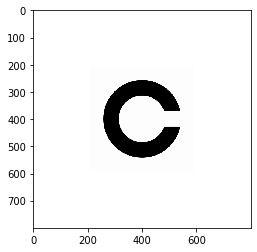

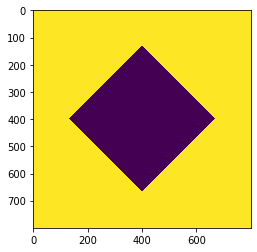

<Figure size 432x288 with 0 Axes>

In [190]:
sub = image_set(file="testing", compress = 2.1, dim = 800) #csd scaling = 0 # after file, noise = 0.2
print(sub.shape) #32 * 16000

for i in range(0, 8):
    plt.figure()
    plt.matshow(sub[random.randint(0,63)].reshape(400,400))
# plt.figure(figsize=(12,4))
# for j in range(1,4):
#     plt.subplot(int("22" + str(j)))
#     plt.imshow(sub[j-1].reshape(400,400), interpolation='nearest')
#     #plt.imshow(sub[j-1].reshape(800,800), interpolation='nearest')
    
# plt.figure(figsize=(12,4))
# for j in range(1,4):
#     plt.subplot(int("22" + str(j)))
#     plt.imshow(sub[j+4-1].reshape(400,400), interpolation='nearest')
    
# plt.figure(figsize=(12,4))
# for j in range(1,4):
#     plt.subplot(int("22" + str(j)))
#     plt.imshow(sub[j+16-1].reshape(400,400), interpolation='nearest')
#     #plt.imshow(sub[j-1].reshape(800,800), interpolation='nearest')
    
# plt.figure(figsize=(12,4))
# for j in range(1,4):
#     plt.subplot(int("22" + str(j)))
#     plt.imshow(sub[j+20-1].reshape(400,400), interpolation='nearest')
#     #plt.imshow(sub[j+4-1].reshape(800,800), interpolation='nearest')

In [27]:
# plt.figure(figsize=(12,4))
# for j in range(1,5):
#     plt.subplot(int("22" + str(j)))
#     plt.imshow(sub[j+4-1][0].reshape(400,400), interpolation='nearest')
itr=1
dim=800
A = np.empty([8*int(np.rint((360/theta)))*itr, dim*dim])
print(A.shape)

(32, 640000)


In [ ]:
#how to display ndarrays as images!
plt.imshow(x, interpolation='nearest')
plt.show()

In [14]:
B = []
for i in range(0,9):
    for j in range(0,9):
        for k in range(0,9):
            B.append(str(i) + str(j) + str(k))
print(B)

['000', '001', '002', '003', '004', '005', '006', '007', '008', '010', '011', '012', '013', '014', '015', '016', '017', '018', '020', '021', '022', '023', '024', '025', '026', '027', '028', '030', '031', '032', '033', '034', '035', '036', '037', '038', '040', '041', '042', '043', '044', '045', '046', '047', '048', '050', '051', '052', '053', '054', '055', '056', '057', '058', '060', '061', '062', '063', '064', '065', '066', '067', '068', '070', '071', '072', '073', '074', '075', '076', '077', '078', '080', '081', '082', '083', '084', '085', '086', '087', '088', '100', '101', '102', '103', '104', '105', '106', '107', '108', '110', '111', '112', '113', '114', '115', '116', '117', '118', '120', '121', '122', '123', '124', '125', '126', '127', '128', '130', '131', '132', '133', '134', '135', '136', '137', '138', '140', '141', '142', '143', '144', '145', '146', '147', '148', '150', '151', '152', '153', '154', '155', '156', '157', '158', '160', '161', '162', '163', '164', '165', '166', '167'

In [10]:
#amount of noise
noises = [.0625*i for i in range(0, 9)]
print(noises)
#size of stimulus (larger compression = smaaller stimulus)
compressions = [.5*i for i in range(2,11)]
print(compressions)
#% translations
scalings = [.125*i for i in range(0,9)] #[::-1] 0 is easier
print(scalings)

iterations = 1
testsize = 0.25

tempfeatures = []
theta = 45
for l in range(0, int(np.rint(360 / theta))):
    for m in range(0, 8*iterations): 
        tempfeatures.append(l * theta)

[0.0, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5]
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]


In [280]:
print(score)
print(permutation_scores)
print(pvalue)

0.275
[0.19 0.05 ... 0.06 0.12]
0.009900990099009901


In [15]:
results = []
split_results = []
subs = image_set(B[0], noise=noises[0], compress=compressions[0], scaling=scalings[0], dim=256, itr=1) #4
#clf = LinearDiscriminantAnalysis()

#print(np.shape(subs), np.shape(tempfeatures))
#cv = StratifiedKFold(5)#tempfeatures, n_splits=5, shuffle=True)

#score, permutation_scores, pvalue = permutation_test_score(clf, subs, tempfeatures, 
#                                                           scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)

(64, 65536)
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0


In [18]:
def cross_validate(X):
    skf = StratifiedKFold(5)
    clf = LinearDiscriminantAnalysis()#solver='lsqr'

    results = []
    accuracy = 0
    tempf = np.array(tempfeatures)
    print(tempf)

    for train, test in skf.split(X, tempf):
        xt, xv, yt, yv = X[train], X[test], tempf[train], tempf[test]
        print(X[train].shape, X[test].shape, tempf[train].shape, tempf[test].shape)
        clf.fit(xt, yt)
        yhat = clf.predict(xv)

        if ((yhat == yv).all() == True):
            results.append(1)
        else:
            results.append(0)

    accuracy = sum(results) / np.shape(results)[0]
    return accuracy

print(cross_validate(subs))

[  0   0 ... 315 315]
(48, 65536) (16, 65536) (48,) (16,)


/mnt/home/luntzel/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


ValueError: Internal work array size computation failed: -10

In [ ]:
print(accuracy)
# print(subs.shape)
# for i in range(0, 63):
#     plt.figure()
#     plt.matshow(subs[i].reshape(256,256))

In [29]:
#confusion matrix would be nice
count = 0
result_matrix = np.empty((9,9,9))
for i in range(0,9):
    for j in range(0,9):
        for k in range(0,9):
            subs = image_set(B[count], noise=noises[i], compress=compressions[j], scaling=scalings[k], dim=256, itr=iterations)
            count += 1
            
#             temp_train, temp_test, tempfeatures_train, tempfeatures_test = train_test_split(subs, tempfeatures,
#                                                                                              test_size=testsize, 
#                                                                                             random_state=42)
#             print(temp_train.shape)
#             print(temp_test.shape)
            
#             #LDA
#             clf = LinearDiscriminantAnalysis()
#             clf.fit(temp_train, tempfeatures_train)
            
#             size = temp_test.shape[0]
#             clone1a = temp_test.copy()
#             results = [0]*size
#             for j in range(size):
#                 if (clf.predict([clone1a[j]]) == tempfeatures_test[j]): #temp in future
#                     results[j] = 1
#                 else:
#                     results[j] = 0

#             print(sum(results), size, sum(results) / size)
            result_matrix[i][j][k] = cross_validate(subs)#sum(results) / size
            #quantify accuracy, etc.

[0.0, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5]
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
[100.0, 87.5, 75.0, 62.5, 50.0, 37.5, 25.0, 12.5, 0.0]


In [141]:
# shift = 4
# x = random.sample(range(shift + 1), 5)
# print(x)
# x = np.zeros((9,9,9))
# print(x.shape, x)
print(random.randint(0,0))

0


In [12]:
#parameters: noise (default at 0), size, % scaling [0,..1], name of file, # of images (don't know how to do that), image 
#dimensions (have to fix dimensions bc right now it specifies a window)

#incorporate compressions

# new_img = img_og.copy()[360:1160, 360:1160]#resize(new_img, (int(np.rint(1520 / (800 / 800))), int(np.rint(1520 / (800 / 800)))))
# print(np.amax(new_img), np.amin(new_img), type(new_img))

# if (2 != 1):
#     rot = visual.compressx(new_img, 2.7)
# #     plt.figure()
# #     plt.imshow(rot)
#     plt.imshow(rot, interpolation='nearest')
#     plt.show()
    
# rot = visual.rotateclean(rot, 45) #[:,:,0] #cut out RGB #img_og

# plt.figure()
# plt.imshow(new_img)

# #rot = rot[start:stop, start:stop]#.flatten()
# # plt.figure()
# # plt.imshow(rot)
# plt.imshow(new_img[start:stop, start:stop])
# plt.show()

def image_set(file, theta=45, noise=0, compress=1.0, scaling=1, dim=256, itr=1):
    shift = int(np.rint((y2[int((compress - 1) * 100)]) * scaling)) #w/o 800/800
    start = int((1520 - 800) / 2)  #1520 - 800 / 2
    stop = int(start + 800) #start + 800
    
#     if (itr > shift):
#         raise TypeError("Dataset will have repeated images. For compression " + compress + ", the upper bound on the number of iterations is " + shift + ".")
        
    #initialize list
    A = np.empty([8*int(np.rint(360/theta))*itr, dim*dim])
    print(A.shape)
    #unnecessary, could just index A
    lst = [0]*8
    
    #print(lst.shape)
    for i in range(0, int(np.rint(360 / theta))):
        #deleted the old code and can't remember how to do it elegantly but this works
        new_img2 = img_og.copy()[start:stop, start:stop]
        if (compress != 1):
            new_img2 = visual.compressx(new_img2, compress)[0:800, 0:800]

        new_img2 = visual.rotateclean(new_img2, theta * i)#[:,:,0] #cut out RGB #img_og
        new_img = img_og.copy()
        new_img[start:stop, start:stop] = new_img2
        new_img = new_img[:,:,0]
        
        for j in range(0, itr):
            a = start + random.randint(0, shift) 
            lst[0] = resize(new_img[a:a+800, start:stop], (dim, dim)).flatten()
            
            a = start - random.randint(0, shift) #start - 
            #lst.append([new_img[a:a+800, start:stop].flatten()])
            lst[1] = resize(new_img[a:a+800, start:stop], (dim, dim)).flatten()
            
            a = start + random.randint(0, shift) #start + 
            #lst.append([new_img[start:stop, a:a+800].flatten()])
            lst[2] = resize(new_img[start:stop, a:a+800], (dim, dim)).flatten()
            
            a = start - random.randint(0, shift)
            #lst.append([new_img[start:stop, a:a+800].flatten()])
            lst[3] = resize(new_img[start:stop, a:a+800], (dim, dim)).flatten()
            
            a = start + random.randint(0, shift)
            b = start + random.randint(0, shift)
            #lst.append([new_img[a:a+800, b:b+800].flatten()])
            lst[4] = resize(new_img[a:a+800, b:b+800], (dim, dim)).flatten()
            
            a = start - random.randint(0, shift)
            b = start + random.randint(0, shift)
            #lst.append([new_img[a:a+800, b:b+800].flatten()])
            lst[5] = resize(new_img[a:a+800, b:b+800], (dim, dim)).flatten()
            
            a = start + random.randint(0, shift)
            b = start - random.randint(0, shift)
            #lst.append([new_img[a:a+800, b:b+800].flatten()])
            lst[6] = resize(new_img[a:a+800, b:b+800], (dim, dim)).flatten()
            
            a = start - random.randint(0, shift)
            b = start - random.randint(0, shift)
            #lst.append([new_img[a:a+800, b:b+800].flatten()])
            lst[7] = resize(new_img[a:a+800, b:b+800], (dim, dim)).flatten()
            
            #is iterations still messed up?
            print(i, j)
            A[i*(8*itr) + j*8:i*(8*itr) + (j+1)*8] = lst
        #A[j*(8*itr):(j+1)*(8*itr)] = lst
        #A[i*(8*itr) + j*8:i*(8*itr) + (j+1)*8] = lst #.copy()
    
    A[A<0.5] = 0
    A[A>=0.5] = 1
    
    #double check noise later, i switched 255 to 1
    if (noise != 0):
        visual.groupswitch(A, noise, dim)
        
    return A

#     np.save(file, A) #check syntax later
    

In [ ]:
    #sampling without repeats
    #factor it later so that ones with the same random range pull from the same list
    x1 = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x1 = [start + i for i in x1]
    print(x1)
    
    x2 = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x2 = [start - i for i in x2]
    print(x2)
    
    x3 = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x3 = [start + i for i in x3]
    print(x3)
    
    x4 = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x4 = [start - i for i in x4]
    print(x4)
    
    x5a = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x5a = [start + i for i in x5a]
    print(x5a)
    x5b = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x5b = [start + i for i in x5b]
    print(x5b)
    
    x6a = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x6a = [start - i for i in x6a]
    print(x6a)
    x6b = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x6b = [start + i for i in x6b]
    print(x6b)
    
    x7a = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x7a = [start + i for i in x7a]
    print(x7a)
    x7b = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x7b = [start - i for i in x7b]
    print(x7b)
    
    x8a = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x8a = [start - i for i in x8a]
    print(x8a)
    x8b = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    x8b = [start - i for i in x8b]
    print(x8b)
    #x2 = random.sample(range(shift + 1), int(np.rint(360 / theta))*itr)
    

In [15]:
tempfeatures = []

for i in range(0, int(np.rint(360 / theta))):
    for j in range(0, itr): 
        tempfeatures.append(i * theta)
            
temp_train, temp_test, tempfeatures_train, tempfeatures_test = train_test_split(A2, tempfeatures, #temp, #A[:,:,0]
                                                                                 test_size=0.25, random_state=42)

print(temp_train.shape)
print(temp_test.shape)

# clf = LinearDiscriminantAnalysis()
# clf.fit(temp_train, tempfeatures_train)

# accuracy = []
# size = temp_test.shape[0]
# clone1a = temp_test.copy()
# results = []
# for j in range(size):
#     if (clf.predict([clone1a[j]]) == tempfeatures_test[j]): #temp in future
#         results.append(1)
#     else:
#         results.append(0)

# print(sum(results), size)

(1782, 640000)
(594, 640000)


In [57]:
#introducing noise into 2376 img. dataset
A2 = A.copy()
for i in range(4):
    for j in range(6):
        print("rotation = ", theta*i, "row indexed = ", 6*i + j, "noise introduced = ", 0.1*j)
        A2[99*j + 594*i:99 + (99*j + 594*i)] = groupswitch(A2[99*j + 594*i:99 + (99*j + 594*i)], 0.1 * j)

print("0, 6, 12, 18 = 0, 1, 7, 13, 19 = .1, ...")

rotation =  0 row indexed =  0 noise introduced =  0.0
rotation =  0 row indexed =  1 noise introduced =  0.1
rotation =  0 row indexed =  2 noise introduced =  0.2
rotation =  0 row indexed =  3 noise introduced =  0.30000000000000004
rotation =  0 row indexed =  4 noise introduced =  0.4
rotation =  0 row indexed =  5 noise introduced =  0.5
rotation =  90 row indexed =  6 noise introduced =  0.0
rotation =  90 row indexed =  7 noise introduced =  0.1
rotation =  90 row indexed =  8 noise introduced =  0.2
rotation =  90 row indexed =  9 noise introduced =  0.30000000000000004
rotation =  90 row indexed =  10 noise introduced =  0.4
rotation =  90 row indexed =  11 noise introduced =  0.5
rotation =  180 row indexed =  12 noise introduced =  0.0
rotation =  180 row indexed =  13 noise introduced =  0.1
rotation =  180 row indexed =  14 noise introduced =  0.2
rotation =  180 row indexed =  15 noise introduced =  0.30000000000000004
rotation =  180 row indexed =  16 noise introduced =

In [17]:
clf = LinearDiscriminantAnalysis()
clf.fit(temp_train, tempfeatures_train)
#62%

/mnt/home/luntzel/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [19]:
import pickle
# now you can save it to a file
with open('lda2376.pkl', 'wb') as f:
    pickle.dump(clf, f)

# and later you can load it
# with open('lda2376.pkl', 'rb') as f:
#     clf = pickle.load(f)

284 594


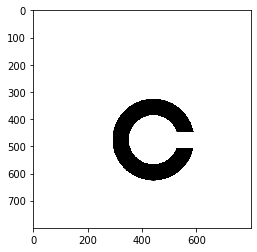

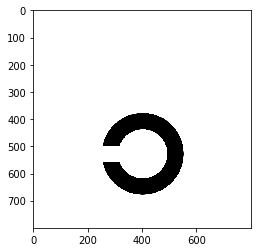

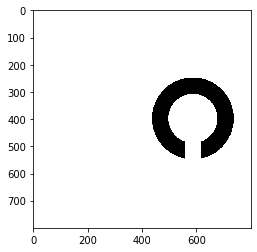

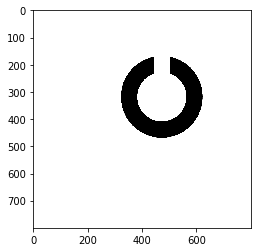

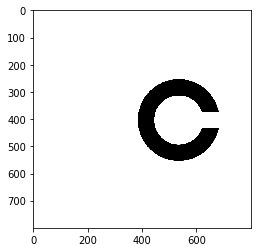

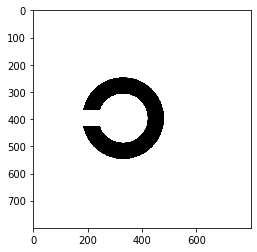

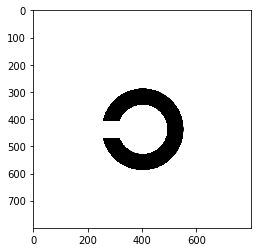

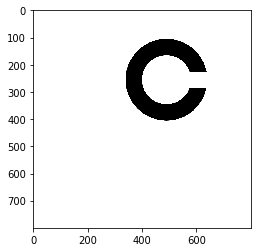

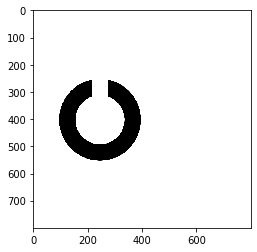

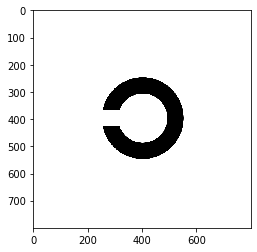

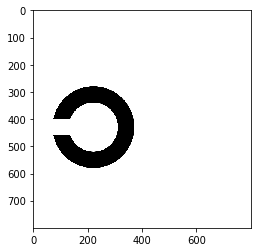

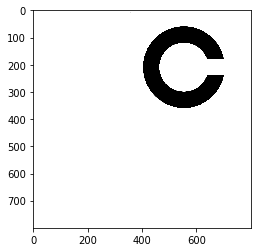

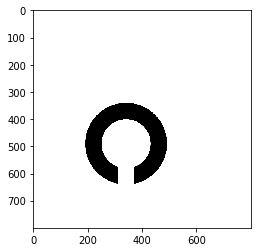

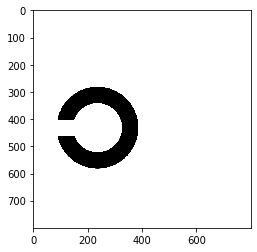

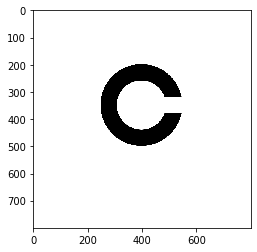

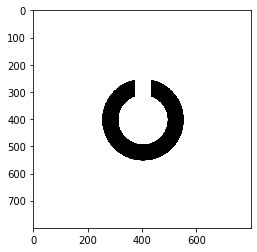

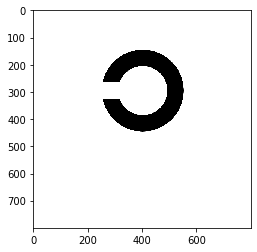

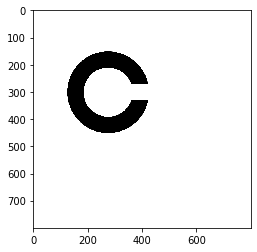

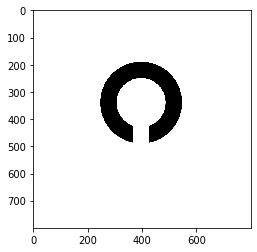

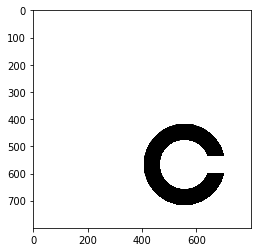

In [160]:
#double checking the well-formedness of images (not clipped off the side, ...)
for i in range(20):
    plt.figure()
    plt.imshow(temp_train[i].reshape(800,800,3))


In [128]:
#looking at baseline accuracy.
#1x compress baseline: 79%
#average: 
accuracy = []
size = temp_test.shape[0]
print("size: ", size)
for i in range(6):
    #build up
#     tempfeatures = []
#     for k in range(0, int(360 / theta)):
#         for l in range(0, 99): 
#             tempfeatures.append(k * theta)
    #temp_train, temp_test, tempfeatures_train, tempfeatures_test = train_test_split(B, tempfeatures, #temp, #A
    #                                                                                 test_size=0.25, random_state=random.randint(0,150))

    print(temp_train.shape)
    print(temp_test.shape)
    clone1a = temp_test.copy()
    
    #make clf
    #clf = LinearDiscriminantAnalysis()
    #clf.fit(temp_train, tempfeatures_train)
    
    #test it
    results = []
    for j in range(size):
        if (clf.predict([clone1a[j]]) == tempfeatures_test[j]): #temp in future
            results.append(1)
        else:
            results.append(0)

    accuracy.append(sum(results))
    print("accuracy: ", accuracy[i], accuracy[i]/32)
    
    #put above prints if it hasnt been called yet
    temp_train, temp_test, tempfeatures_train, tempfeatures_test = train_test_split(A, tempfeatures, #temp, #A
                                                                                     test_size=0.25, random_state=random.randint(0,150))
    clf = LinearDiscriminantAnalysis()
    clf.fit(temp_train, tempfeatures_train)
    
print(accuracy)
print("average: ", sum(accuracy) / 6)

NameError: name 'temp_test' is not defined

In [31]:
print("average: ", sum(accuracy) / 20)

average:  37.4


size:  33
accuracy:  9
accuracy:  8
accuracy:  9
accuracy:  9
accuracy:  10
accuracy:  10
accuracy:  12
accuracy:  12
accuracy:  12
accuracy:  11
accuracy:  11
accuracy:  12
accuracy:  10
accuracy:  10
accuracy:  10
accuracy:  10
accuracy:  10
accuracy:  10
accuracy:  10
accuracy:  10
sum1:  13.787878787878793 sum2:  6.212121212121211
mean absolute error:  0.6893939393939397


/mnt/home/luntzel/.local/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


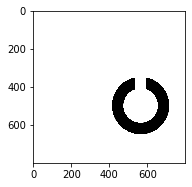

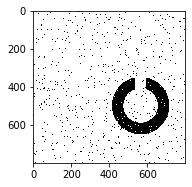

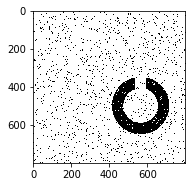

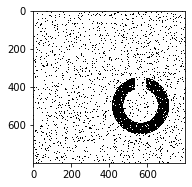

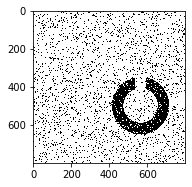

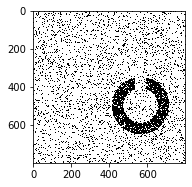

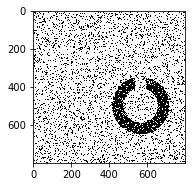

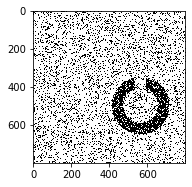

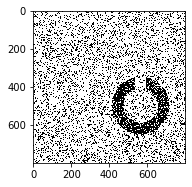

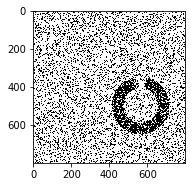

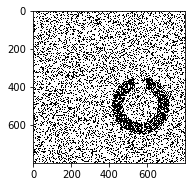

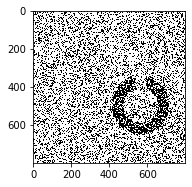

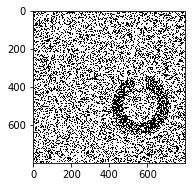

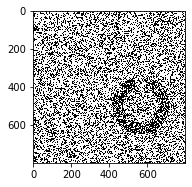

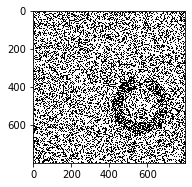

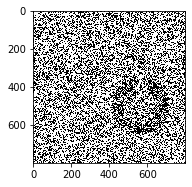

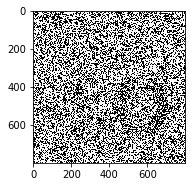

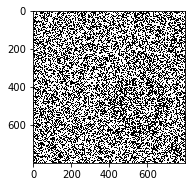

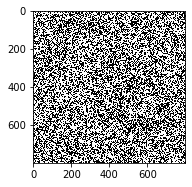

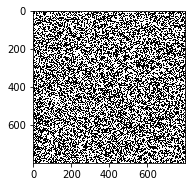

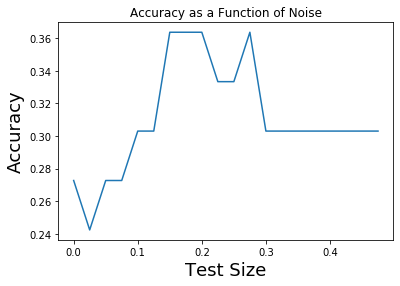

In [164]:
#model evaluation (scikit learn) will be a good way to classify accuracy - quantifying quality of predictions
#producing a confusion matrix

#testing as a function of noise
fineness = 20
accuracy = []
individual_results = [] #[][], [[]]
size = temp_test.shape[0]
print("size: ", size)
noises2 = []
imagenum = list(range(size))
for i in range(fineness):
    clone1a = temp_test.copy()
    clone1a = groupswitch(clone1a, (.5/fineness) * i) #.5 .025
    plt.figure()
    plt.subplot(121)
    plt.imshow(clone1a[0].reshape(800,800,3))
    
    noises2.append(.025 * i) #.025 .00125
    results = []
    for j in range(size):
        if (clf.predict([clone1a[j]]) == tempfeatures_test[j]): #temp in future
            results.append(1)
        else:
            results.append(0)
    individual_results.append(results)
    accuracy.append(sum(results))
    print("accuracy: ", accuracy[i])

error_sum = 0 #at i = 0

#do accuracy, not error
errors2 = []
for i in range(0, 20):
    #errors.append(abs(size - accuracy[i]) / size)
    errors2.append(accuracy[i] / size)
    error_sum += (abs(size - accuracy[i]) / size) #could just summ errors at the end
    
sum2 = sum(errors2)
print("sum1: ", error_sum, "sum2: ", sum2)

#not exactly mean-absolute because i'm accounting for the size in each term of the error sum
mean_absolute_error = error_sum / 20

print("mean absolute error: ", mean_absolute_error)

plt.figure()
plt.plot(noises2, errors2)
plt.title("Accuracy as a Function of Noise")
plt.xlabel('Test Size',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()

# ind2 = [[]]
# for i in range(len(individual_results)):
#     for j in range(size):
#         ind2[i][j] = sum(individual_results[i][0, j])

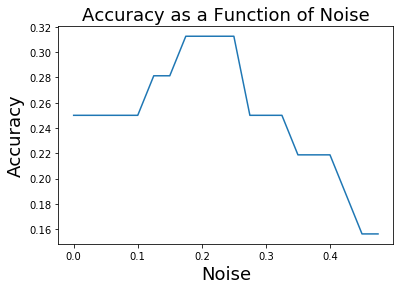

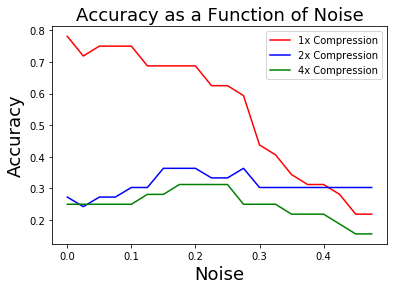

In [171]:
plt.figure()
#noises, errors = 1x compressed
#noises1, errors1 = 4x compressed
#noises2, errors2 = 2x compressed
plt.plot(noises1, errors1)
#plt.bar(noises, errors)
#plt.scatter(noises, errors) #how to make scatter work
plt.title("Accuracy as a Function of Noise", fontsize=18)
plt.xlabel('Noise',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
#plt.savefig('2xcompressio.png')
plt.show()

# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.xlabel('Test Size',fontsize=18)
# plt.ylabel('Error',fontsize=18)
# plt.show()

# plt.figure()
# plt.imshow(testing)
# misc.imsave(img_path, img)
# plt.imsave("image" + str(i) + ".png".format(OUTPUT_DIR, epoch), predictions[i, :, :, 0] * 127.5 + 127.5, cmap = "gray")

plt.figure()
plt.title('Accuracy as a Function of Noise', fontsize=18)
plt.xlabel('Noise',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.plot(noises, errors[0:20], 'r', label='1x Compression') # plotting t, a separately 
plt.plot(noises2, errors2, 'b',  label='2x Compression') # plotting t, b separately 
plt.plot(noises1, errors1, 'g',  label='4x Compression') # plotting t, c separately 
plt.legend()
plt.savefig('composite.png')
plt.show()

In [ ]:
totals = []
# ind2.append(sum(individual_results[1]))
# subsum = 0
for i in range(0, len(individual_results)): # 0 to len(individual_results) once you initialize it as [] and not [[]]
    ind2 = 0
    for j in range(0, size):
        ind2 = ind2 + individual_results[i][j]
    totals.append(ind2)
    
print(totals)
totals = np.array(totals) / 46
x = np.arange(20) / 40
# plt.figure()
# plt.title('Classification Across Different Noises')
# plt.xlabel('Image #')
# plt.ylabel('Total Correct')
# plt.scatter(imagenum, totals) #plot
# plt.show()
fig, ax = plt.subplots() #with # in () if >1
ax.scatter(x, totals)
ax.set_xlabel('Noise')
ax.set_ylabel('Percent Accuracy')
fig.set_size_inches([9, 9])

#copy reused functions into a .py file (save it into the same directory)
#then just import it
#use len instead of storing hardcoded variables

In [ ]:
# print("all results: ", individual_results)
# print("total correct, trial 1: ", sum(individual_results[1]))
# print("total correct, trials 2 - 4: ",sum(individual_results[2]), sum(individual_results[3]), sum(individual_results[4]))
# print("first element: ", individual_results[1][0])
# print("size: ", size)
# print("len: ", len(individual_results[1]))

#x-axis is level of noise (SNR), highest SNR is no noise at all
#y-axis is average or total (average accuracy from 0 to 1)

ind2tot = []
# ind2.append(sum(individual_results[1]))
# subsum = 0
for i in range(1, len(individual_results)): # 0 to len(individual_results) once you initialize it as [] and not [[]]
    #fencepost first answer 1/0
    ind2 = np.zeros(size)
    ind2[0] = (individual_results[i][0])
    print("first element: ", ind2[0])
    for j in range(0, size - 1):
        #print("jth element: ",ind2[j])
        #print("individual result (j+1)th element: ", individual_results[i][j + 1])
        #take first element of a row, [i][0], and add the next value in individual results
        ind2[j + 1] = ind2[j] + individual_results[i][j + 1]
            #sum(individual_results[i][0, 0:j])
    ind2tot.append(ind2)
    
print("ind2tot: ", ind2tot)
print(len(ind2tot))

plt.figure()
plt.title('Classification Across Different Noises')
plt.xlabel('Image #')
plt.ylabel('Total Correct')
plt.plot(ind2tot[0], imagenum)
# plt.plot(ind2tot[1], imagenum)
# plt.plot(ind2tot[2], imagenum)
# plt.plot(ind2tot[3], imagenum)
plt.plot(ind2tot[4], imagenum)
# plt.plot(ind2tot[5], imagenum)
# plt.plot(ind2tot[6], imagenum)
# plt.plot(ind2tot[7], imagenum)
# plt.plot(ind2tot[8], imagenum)
plt.plot(ind2tot[9], imagenum)
# plt.plot(ind2tot[10], imagenum)
# plt.plot(ind2tot[11], imagenum)
# plt.plot(ind2tot[12], imagenum)
# plt.plot(ind2tot[13], imagenum)
plt.plot(ind2tot[14], imagenum)
# plt.plot(ind2tot[15], imagenum)
# plt.plot(ind2tot[16], imagenum)
# plt.plot(ind2tot[17], imagenum)
# plt.plot(ind2tot[18], imagenum)
plt.plot(ind2tot[19], imagenum)
plt.legend()
plt.show()

In [101]:
rho=20
xystep=0.05
xrange = (-8,8)
yrange =  (-8,8)
model = p2p.models.ScoreboardModel(rho =rho, xystep =xystep, xrange = xrange, yrange = yrange)
model.build()

ScoreboardModel(engine='joblib', grid_type='rectangular', n_jobs=-1, rho=20, 
                scheduler='threading', thresh_percept=0.6065306597126334, 
                verbose=True, xrange=(-8, 8), xystep=0.05, yrange=(-8, 8))

(800, 800)


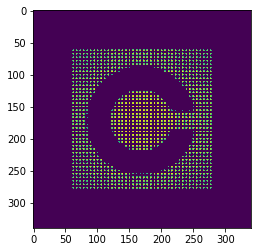

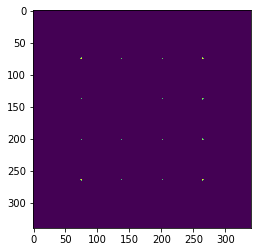

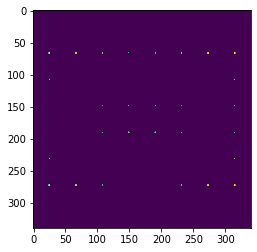

In [102]:
imm = img_original[200:1000, 200:1000, 0] #[:, :, 0]

print(imm.shape)
imm1 = resize(imm, (37, 37)) #IMS
imm2 = resize(imm, (40, 40)) #AMS
imm3 = resize(imm, (4, 4)) #Argus I
imm4 =resize(imm, (6, 10)) #Argus II



# IMS_implant = p2p.implants.AlphaIMS(x=0, y=0, z=100, rot=0, stim=imm1.flatten())
# percept = model.predict_percept(IMS_implant)

# plt.figure()
# plt.imshow(percept)

AMS_implant = p2p.implants.AlphaAMS(x=0, y=0, z=100, rot=0, stim=imm2.flatten())
p2ercept = model.predict_percept(AMS_implant)

plt.figure()
plt.imshow(p2ercept)

ArgusI_implant = p2p.implants.ArgusI(x=0, y=0, z=100, rot=0, stim=imm3.flatten())
p3ercept = model.predict_percept(ArgusI_implant)

plt.figure()
plt.imshow(p3ercept)

ArgusII_implant = p2p.implants.ArgusII(x=0, y=0, z=100, rot=0, stim=imm4.flatten())
p4ercept = model.predict_percept(ArgusII_implant)

plt.figure()
plt.imshow(p4ercept)

#imm = Image.frombytes("L", (800, 800), imm.astype(np.int8).tostring())

#800x800, 37x37, 

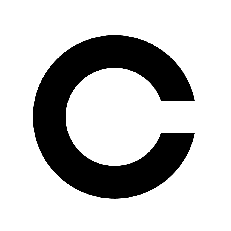

In [61]:
# plt.figure()
# plt.axis('off')
# plt.imshow(resize(percept2[65:275, 55:275], (800, 800)))
# plt.savefig('axonmap.png')

# plt.figure()
# plt.axis('off')
# plt.imshow(resize(percept[65:275, 65:275], (800, 800)))
# plt.savefig('scoreboard.png')

plt.figure()
plt.axis('off')
plt.imshow(img_original[200:1000, 200:1000])
plt.savefig('landoltcropped.png')

In [ ]:
model = p2p.models.AxonMapModel(rho =rho, xystep =xystep, xrange = xrange, yrange = yrange)
model.build()

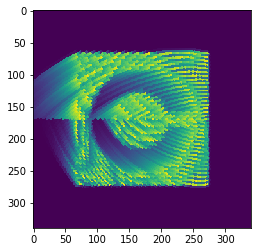

In [43]:
IMS_implant2 = p2p.implants.AlphaIMS(x=0, y=0, z=100, rot=0, stim=imm.flatten())
percept2 = model.predict_percept(IMS_implant2)

plt.figure()
plt.imshow(percept2)
#axon_map = AxonMapModel(n_axons=n_bundles, loc_od_x=loc_od[0],
#                           loc_od_y=loc_od[1], eye=implant.eye)

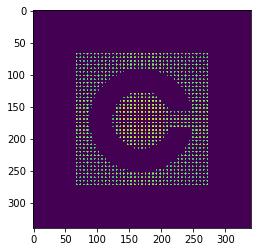

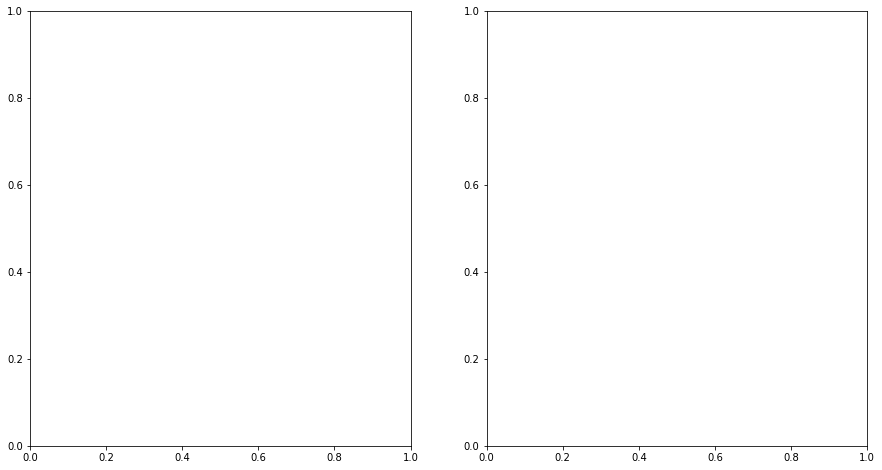

In [127]:
#fundus
fig1 ,axes1 = plt.subplots(ncols=2, figsize=(150, 80))
fig2, axes2 = plt.subplots(ncols=2, figsize=(15, 8))
#(x_center=-800, y_center=-400, h=0, rot=np.deg2rad(-35), eye='RE')
# a1le = p2p.implants.argus.ArgusI(eye='LE')
# a2le = p2p.implants.argus.ArgusII(eye='LE')
# a1re = p2p.implants.argus.ArgusI()
# a2re = p2p.implants.argus.ArgusII()
#p2p.viz.plot_fundus(a1re, ax=axes1[0], upside_down=False)
p2p.viz.plot_fundus(p2p.implants.AlphaAMS(), ax=axes1[0], upside_down=False)
#p2p.viz.plot_fundus(a1le, ax=axes1[1], upside_down=False)
fig1.tight_layout()

In [ ]:
IMS = A.copy()
for i in range(0, A.shape[0]):
    ims_stim = A[i]
    print(i, len(ims_stim))
    IMS_implant =p2p.implants.AlphaIMS(x=0, y=0, z=100, rot=0, stim=ims_stim)
    percept = model.predict_percept(IMS_implant)
    IMS[i] = percept

#all

In [11]:
#SVM next (robustness) sklearn.svm.SVC
#800x800 smaller (this would fix the memory error)

#ims_img_stim = sit.resize(img, (37, 37))
#take this weird purple yellow stuff for now then try to convert after it's passed through the implant
# print(A[47])
# for i in range(0, 4):
#     ims_stim = A[i]
#     print(i, len(ims_stim))
#     IMS_implant =p2p.implants.AlphaIMS(x=0, y=0, z=100, rot=0, stim=ims_stim)
#     percept = model.predict_percept(IMS_implant)
#     plt.figure()
#     plt.imshow(percept)
subs = A[0].copy()
subs = subs.reshape(800,800,3)
print()
#yellow and purple image, try the bigger dataset with 3 colors removed
#subs = subs[:, :, 0].flatten()
#print(subs.shape)
plt.figure()
plt.imshow(subs)
# a = Image.frombytes("L", size, o.astype(np.int8).tostring())
# subs = Image.frombytes("L", (800, 800), subs.astype(np.int8).tostring())
# # subs = Image.fromarray(subs.astype(np.uint8))
# plt.figure()
# plt.imshow(subs)

#im2 = resize(A[0].copy(), 37, 37, 3)

#im2 = subs.thumbnail((37,37), Image.ANTIALIAS)
# shrunk = resize(img.copy(), (int(img.shape[0] / factor), int(img.shape[1] / factor), int(img.shape[2])))

# plt.figure()
# plt.imshow(im2)

# IMS_implant = p2p.implants.AlphaIMS(x=0, y=0, z=100, rot=0, stim=subs.resize(37, 37)) #resize(img.copy(), (int(img.shape[0] / factor), int(img.shape[1] / factor), int(img.shape[2])))
# percept = model.predict_percept(IMS_implant)
# plt.figure()
# plt.imshow(percept)

    
# for i in range(0, 4):
#     for j in range(0, 12):
#         IMS_implant =p2p.implants.AlphaIMS(x=0, y=0, z=100, rot=0, stim=img_original.flatten())
#         percept = model.predict_percept(IMS_implant)
#         plt.figure()
#         plt.imshow(percept)
#         A[i][j] = percept
#ims 37x37, ams 40x40, 

NameError: name 'A' is not defined

[[[1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]]]
None


TypeError: Image data of dtype object cannot be converted to float

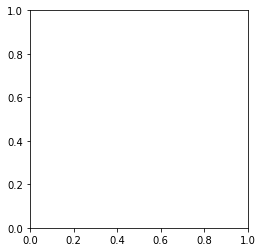

In [53]:
#WIP
def rgb2gray(rgb):
    for i in range(800):
        for j in range(800):
            rgb[i][j][0] = rgb[i][j][0] * .2989
            rgb[i][j][1] = rgb[i][j][1] * .5870
            rgb[i][j][2] = rgb[i][j][2] * .1140
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

subs = A[0].copy()
subs = subs.reshape(800,800,3)
print(subs)
#img = mpimg.imread('image.png')     
gray = rgb2gray(subs)    
print(gray)
# gray = Image.frombytes("L", (800, 800), gray.astype(np.int8).tostring())
plt.imshow(gray)
plt.show()